In [ ]:
import numpy as np
import numba
from numba import jit , njit
import numpy as np
import os
import sys
import pandas
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import log2
from sklearn import preprocessing
import sys
import timeit
import datetime
import json
import random
from collections import defaultdict
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.cluster import KMeans
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.metrics import pairwise_distances

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.8 MB/s eta 0:00:00


### **Note** that you might need to uncomment some portions of balance and fairness error methods while executing Bank dataset (three valued protected group)

In [ ]:
# Global Config Variables
n0 = 1000  # number of p=0 points in metric space

K = 10 # No of clusters
A= 5 # No of attributes
iterations = 1  # maximum iteration in clustering
runs =10
option='Kmeans'  #Kmedian
dataset ='Adult'  #Bank

In [ ]:
print(os.getcwd())
def load_Bank(data_dir='',frac=1):

    data_dir = data_dir
    _path = '/content/sample_data/bank-full_p_6col.csv'
    data_path = os.path.join(data_dir, _path)
    df = pandas.read_csv(data_path, sep=',')
    df=df.sample(frac=frac)
    #print(df.head())
    #print(len(df))

    return df


/content


In [ ]:
print(os.getcwd())
def load_Adult(data_dir='',frac=1):

    data_dir = data_dir
    _path = '/content/sample_data/adult_p.csv'
    data_path = os.path.join(data_dir, _path)


    df = pandas.read_csv(data_path, sep=',')
    df=df.sample(frac=frac)

    return df
load_Adult()

/content


,age,fnlwgt,education_num,capital_gain,hours_per_week,type
8140,-0.422486,0.385361,0.789965,-0.209014,-0.072607,1
5642,0.484877,-0.739786,-0.173122,-0.429994,-0.052398,0
9468,0.042509,-0.113811,0.037193,0.622793,0.772001,1
9293,-0.657502,0.725647,0.190931,-0.014363,-0.066832,0
25395,0.941458,0.173069,-0.280743,-0.014688,-0.068344,0
...,...,...,...,...,...,...
29201,0.012021,-0.013886,0.984524,-0.164634,-0.057191,0
8048,0.910691,-0.032799,0.009917,-0.388870,-0.135086,0
10820,0.021495,-0.592434,0.075208,0.795264,-0.102266,1
26241,0.146257,-0.493340,-0.827334,0.208546,-0.085160,0


In [ ]:
def frac_data(frac):
    if dataset=='Bank':
        df=load_Bank()
        df= df.round(decimals=5)
        print(len(df))
        df = df.dropna()
        print(len(df))
        df['type'] = df['type']-1
        typ = df['type'].values
        #print(len(typ))
        #print(df.head(10))
        c3 = np.count_nonzero(typ == 2)

        print(c1/(c1+c2+c3))
        print(c2/(c1+c2+c3))
        print(c3/(c1+c2+c3))


        print(c1)
        print(c2)
        print(c3)
        dfDropped = df.drop(columns=['type'])

    elif dataset=='Adult':
        df=load_Adult()
        df= df.round(decimals=5)
        print(len(df))
        df = df.dropna()
        print(len(df))
        #df['type'] = df['type']-1
        typ = df['type'].values
        #print(len(typ))
        #print(df.head(10))
        c1 = np.count_nonzero(typ == 0)
        c2 = np.count_nonzero(typ == 1)

        print(c1/(c1+c2))
        print(c2/(c1+c2))

        print(c1)
        print(c2)
        dfDropped = df.drop(columns=['type'])
    return df,dfDropped

In [ ]:
def VanillaKmeans(X, k,seedValue):
    """
    specify the number of clusters k and
    the maximum iteration to run the algorithm
    """
    n_row, n_col = X.shape
    maxiter=100

    # randomly choose k data points as initial centroids


    rand_indices = np.random.choice(n_row, size = k)
    centroids = X[rand_indices]
    cost_variation=[]
    cnt =0
    for itr in range(maxiter):
        # compute distances between each data point and the set of centroids
        # and assign each data point to the closest centroid
        distances_to_centroids = pairwise_distances(X, centroids, metric = 'sqeuclidean',force_all_finite=True)
        cluster_assignment = np.argmin(distances_to_centroids, axis = 1)

        # select all data points that belong to cluster i and compute
        # the mean of these data points (each feature individually)
        # this will be our new cluster centroids
        new_centroids=[]
        for i  in range(k):
            #print(i)
            assign= np.array([X[cluster_assignment == i]])

            med = np.mean(assign[0],axis=0)
            new_centroids.append(med)


        # if the updated centroid is still the same,
        # then the algorithm converged
        new_centroids = np.array(new_centroids)
        #print("Median"+str(new_centroids))

        #print("Centrer"+str(centroids))
        if np.all(centroids == new_centroids):
            cnt = cnt+1
            if cnt ==4:
                break

        centroids = new_centroids

        heterogeneity = 0
        for i in range(k):
            # note that pairwise_distance only accepts 2d-array
            cluster_data = X[cluster_assignment == i]
            distances = pairwise_distances(cluster_data, [centroids[i]], metric = 'euclidean')
            heterogeneity += np.sum(distances ** 2) #sq euclidean
        cost_variation.append(heterogeneity)


    return centroids, cluster_assignment, heterogeneity,cost_variation#(cost)


def VanillaKmedian(X, k,seedValue):
    """
    specify the number of clusters k and
    the maximum iteration to run the algorithm
    """
    n_row, n_col = X.shape
    maxiter=100

    # randomly choose k data points as initial centroids
    #if seed is not None:
     #   np.random.seed(seed)

    rand_indices = np.random.choice(n_row, size = k)
    centroids = X[rand_indices]
    cost_variation=[]
    cnt =0
    for itr in range(maxiter):
        # compute distances between each data point and the set of centroids
        # and assign each data point to the closest centroid
        distances_to_centroids = pairwise_distances(X, centroids, metric = 'sqeuclidean',force_all_finite=True)
        cluster_assignment = np.argmin(distances_to_centroids, axis = 1)

        # select all data points that belong to cluster i and compute
        # the mean of these data points (each feature individually)
        # this will be our new cluster centroids
        new_centroids=[]
        for i  in range(k):
            #print(i)
            assign= np.array([X[cluster_assignment == i]])
            med = np.median(assign[0],axis=0)
            new_centroids.append(med)

        # if the updated centroid is still the same,
        # then the algorithm converged
        new_centroids = np.array(new_centroids)

        if np.all(centroids == new_centroids):

                break

        centroids = new_centroids

        heterogeneity = 0
        for i in range(k):
            # note that pairwise_distance only accepts 2d-array
            cluster_data = X[cluster_assignment == i]
            distances = pairwise_distances(cluster_data, [centroids[i]], metric = 'euclidean')
            heterogeneity += np.sum(distances ** 2) #sq euclidean
        cost_variation.append(heterogeneity)


    return centroids, cluster_assignment, heterogeneity,cost_variation#(cost)



In [ ]:
def dual_print(f,*args,**kwargs):
    #print(*args,**kwargs)
    print(*args,**kwargs,file=f)

def load_dataset(csv_name):
    # read the dataset from csv_name and return as pandas dataframe
    df = pd.read_csv(csv_name, header=None)
    return df


def k_random_index(df,K):
    # return k random indexes in range of dataframe
    return random.sample(range(0, len(df)), K)

def find_k_initial_centroid_Kmeans(df,K,seedValue):
    kmeans=KMeans(n_clusters=int(K),random_state=int(seedValue)).fit(df)
    return kmeans.cluster_centers_


def find_k_initial_centroid(df,K):
    centroids = []    # make of form [ [x1,y1]....]

    rnd_idx = k_random_index(df,K)

    for i in rnd_idx:
        coordinates =[]
        for a in range(0,A):
            coordinates.append(df.loc[i][a])
        centroids.append(coordinates)   #df is X,Y,....., Type

    return centroids

#nOt using
def calc_distance(x1, y1, x2, y2):
    # returns the euclidean distance between two points
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

def calc_distance_a(centroid, point):
    #print('çalculating distance\n')

    sum_ = 0

    for i in range(0, len(centroid)):
        sum_ = sum_ + (centroid[i]-point[i])**2

    return sum_ #**0.5

@njit(parallel=False)
def find_distances_fast(k_centroids, df):
    #print("Inside fast distances")


    dist = np.zeros((len(k_centroids),len(df),A+2),np.float64)
    Kcnt = 0
    for c in k_centroids:  #K-centroid is of form [ c1=[x1,y1.....z1], c2=[x2,y2....z2].....]
        #print("C: "+str(Kcnt))
        l = np.zeros((len(df),A+2),np.float64)

       # for row in df:
        index = 0
        for row in df:                # row is now x,y,z......type
            # append all coordinates to point
            dis = np.sum((c- row[:A])**2)#calc_distance_a(c, point)
            #Processing the vector for list
            row_list = np.array([dis])
            #append distance or l norm
            row_list = np.append(row_list,row[:A+1])
            #append all coordinates #append type of this row

            l[index] = row_list
            index = index + 1
            #l.append([calc_distance(c[0], c[1], row[0], row[1]), row[0], row[1], row[2]])  # [dist, X, Y,....Z , type]
            # l contains list of type [dist,X,Y.....,Z,type] for each points in metric space
        dist[Kcnt]= l
        Kcnt = Kcnt + 1

    # return dist which contains distances of all points from every centroid

    return dist

def find_distances(k_centroids, df):
    dist = []
    for c in k_centroids:  #K-centroid is of form [ c1=[x1,y1.....z1], c2=[x2,y2....z2].....]
        l = []


        for index, row in df.iterrows():                # row is now x,y,z......type
            point =[]
            for a in range(0, A):
                point.append(row.iloc[a])  # append all coordinates

            dis = calc_distance_a(c, point)
            #Processing the vector for list
            row_list = [dis]
            #append distance or l norm

            for a in range(0, A):
                row_list.append(row.iloc[a])   #append all coordinates
            #print(row.iloc[a+1])
            row_list.append(row.iloc[a+1])   #append type of this row

            l.append(row_list)
            #l.append([calc_distance(c[0], c[1], row[0], row[1]), row[0], row[1], row[2]])  # [dist, X, Y,....Z , type]
            # l contains list of type [dist,X,Y.....,Z,type] for each points in metric space
        dist.append(l)

    # return dist which contains distances of all points from every centroid

    return dist


def sort_and_valuation(dist):
    sorted_val = []

    for each_centroid_list in dist:
        each_centroid_list_sorted = sorted(each_centroid_list, key=lambda x: (x[A+1], x[0]))  # A+1 is index of type , 0 is dist
        sorted_val.append(each_centroid_list_sorted)

        # sort on basis of type & then dist.
        # Now all whites are towards start and all black are after white as they have additional V added to their valuation
        # Among the whites, the most closest is at start of list as it has more valuation.
        # Similarly sort the black points among them based on distance as did with white

    return sorted_val


def clustering(sorted_valuation, hashmap_points,K):
    n = len(hashmap_points.keys())  # total number of points in metric space


    cluster_assign = []

    for i in range(0, K):
        cluster_assign.append([])  # initially all clusters are empty

    map_index_cluster = []
    for i in range(0,K+2):
        map_index_cluster.append(0)
        #initially check all sorted evaluation from 0th index

    number_of_point_alloc = 0
    curr_cluster = 0

    # until all points are allocated
    while number_of_point_alloc != n:  # As convergence is guaranteed that all points will be allocated to some cluster set
        #print('Number of point alloc : '+str(number_of_point_alloc))
        start_inde = map_index_cluster[curr_cluster % K]

        for inde in range(start_inde,len(sorted_valuation[curr_cluster % K])):
            each = sorted_valuation[curr_cluster % K][inde]
            # each is (dist,X,Y,....Z,type)


            if hashmap_points[tuple(each[1: -1])] == 0:    # each is (dist, X,Y,....Z, type)
                cluster_assign[curr_cluster].append(each)
                hashmap_points[tuple(each[1: -1])] = 1
                number_of_point_alloc += 1
                map_index_cluster[curr_cluster % K] = inde  #next time start from here as isse prev all allocated
                break

        curr_cluster = (curr_cluster + 1) % K

    return cluster_assign


def update_centroids_median(cluster_assign,K):
    new_centroids = []
    for k in range(0, K):

        cAk =  np.array(cluster_assign[k])
        cAk = np.delete(cAk,[0,-1],axis=1)
        #print(len(cAk))
        if len(cAk) %2 ==0 and len(cAk)>0:
            cc = [np.median(np.array(cAk[:-1])[:,cl]) for cl in range(0,cAk.shape[1])]
            new_centroids.append(cc)
        elif len(cAk) %2 !=0 and len(cAk)>0:
            cc = [np.median(np.array(cAk)[:,cl]) for cl in range(0,cAk.shape[1])]
            new_centroids.append(cc)
        elif len(cAk)==0:
            print("Error: No centroid found updation error")

    return new_centroids



def update_centroids(cluster_assign,K):

    new_centroids = []
    for k in range(0, K):

        sum_a = []

        for i in range(0, A):
            sum_a.append(0)

        for each in cluster_assign[k]:
            sum_a = [sum(x) for x in zip(sum_a, each[1:-1])]
            #each is (dist,X,Y,.....Z,type)

        new_coordinates = []
        for a in range(0, A):
            new_coordinates.append(sum_a[a] / len(cluster_assign[k]))
        new_centroids.append(new_coordinates)
        k=k+1



    return new_centroids


def calc_clustering_objective(k_centroid, cluster_assign,K):
    cost = 0

    for k in range(0, K):

        for each in cluster_assign[k]:  #each is (dist, X,Y,....,Z,type)
            dd = calc_distance_a(k_centroid[k], each[1:-1])
            cost = cost + (dd)

    return cost


#needs updation if dataset is Bank
def calc_fairness_error(df, cluster_assign,K):
    U = []  # distribution of each type in original target dataset for each J = 0 , 1....
    P_k_sum_over_j = []  # distribution in kth cluster  sum_k( sum_j(   Uj * j wale/total_in_cluster ) )

    f_error = 0
    cnt_j_0 = 0
    cnt_j_1 = 0
  #  cnt_j_2 = 0
    cnt = 0
    for index, row in df.iterrows():
        if row.iloc[-1] == 1:
            cnt_j_1 += 1
        elif row.iloc[-1] == 0:
            cnt_j_0 += 1
      #  elif row.iloc[-1] == 2:
        #    cnt_j_2 += 1

        cnt += 1

    U.append(cnt_j_0 / cnt)
    U.append(cnt_j_1 / cnt)
    #U.append(cnt_j_2 / cnt)



    for k in range(0, K):  # for each cluster

        for j in range(0, len(U)):   #for each demographic group

            cnt_j_cluster = 0
            cnt_total = 0

            for each in cluster_assign[k]:
                if int(each[-1]) == j:    #each is (dist,X, Y.....,Z,type)
                    cnt_j_cluster += 1
                cnt_total += 1

            if cnt_j_cluster !=0 and cnt_total != 0:
                P_k_sum_over_j.append(-U[j] * np.log((cnt_j_cluster / cnt_total)/U[j]))
            else:
                P_k_sum_over_j.append(0)  #log(0)=0 considered

    for each in P_k_sum_over_j:
        f_error += each

    return f_error

#Balance function needs updation for Bank Dataset by uncommenting the commented part
def calc_balance(cluster_assign,K):
    S_k = []  # balance of each k cluster
    balance = 0  # min (S_k)

    for k in range(0, K):
        cnt_j_0 = 0
        cnt_j_1 = 0
       # cnt_j_2 = 0
        cnt = 0
        for each in cluster_assign[k]:

            if int(each[-1]) == 1:
                cnt_j_1 += 1
            elif int(each[-1]) == 0:
                cnt_j_0 += 1
           # elif int(each[-1]) == 2:
           #     cnt_j_2 += 1

            cnt += 1

        if cnt_j_0 != 0 and cnt_j_1 != 0 :#and cnt_j_2!= 0:
            S_k.append(min([cnt_j_0 / cnt_j_1, cnt_j_1 / cnt_j_0 ]))#, cnt_j_1 / cnt_j_2 , cnt_j_2 / cnt_j_1 , cnt_j_0 / cnt_j_2, cnt_j_2 / cnt_j_0 ]))
        elif cnt_j_0 == 0 or cnt_j_1 ==0  :#or cnt_j_2==0:
            S_k.append(0)



    balance = min(S_k)

    return balance


In [ ]:


def main():
    # Step1 : Load the dataset

    list_fair_K=[]
    list_obj_K =[]
    list_balance_K=[]
    list_obj_K_std =[]
    list_fair_K_std=[]
    list_balance_K_std=[]


    os.makedirs('Adult_kmeans_center')

    for kk in [2,5,10,15,20,30,40]:
        K = kk

        print(" K=="+str(K)+"  ")

        list_fair_run=[]
        cost_variation_ck_collec =[]
        cost_variation_collec = []
        list_obj_run =[]
        list_balance_run=[]
        seeds = [0,100,200,300,400,500,600,700,800,900,1000,1100]

        for run in range(0,runs):
            np.random.seed(seeds[run])
            random.seed(seeds[run])
            f = open('Adult_kmeans_center/K_'+str(K)+'_run_'+str(run)+'_output.txt', 'a')


            list_fair_iter=[]
            list_obj_iter =[]
            list_balance_iter=[]

            # Step2 : Find initial K random centroids using k_random_index(df) & find_k_initial_centroid(df)
            if option=='Kmeans':
                k_centroid,_,_,cost_variation= VanillaKmeans(dfDropped.values,kk,seeds[run])#VanillaKmeans()find_k_initial_centroid_Kmeans(dfDropped,kk,seeds[run])#find_k_initial_centroid(df,kk)
            else:
                k_centroid,_,_,cost_variation= VanillaKmedian(dfDropped.values,kk,seeds[run])#VanillaKmeans()find_k_initial_centroid_Kmeans(dfDropped,kk,seeds[run])#find_k_initial_centroid(df,kk)
            cost_variation_ck = []

            for eac in cost_variation:
                cost_variation_ck.append(eac)


            prev_assignment =[]
            cluster_assignment = []

            for i in range(0, K):
                cluster_assignment.append([])  # initially all clusters are empty

            sum_time = 0
            curr_itr = 0
            prev_objective_cost=-1
            objective_cost = 0
                # Step3 : Find distances from the centroids using find_distances() with list of [ [x1,y1,z1..] , [x2,y2,z2..]....] centroids format list
            while curr_itr < iterations:# and prev_objective_cost != objective_cost:



                df1 = df.values
                k_centroids1= np.array(k_centroid)

                dist = find_distances_fast(k_centroids1, df1)

                valuation = sort_and_valuation(dist)

                #Step5 : Perform clustering using valuation matrix & hashmap of all points in metric
                hash_map = {}
                for index, row in df.iterrows():
                    temp = tuple(row[:-1])
                    hash_map.update({tuple(row[:-1]): 0})   #dict is of form { (x,y): 0 , ....}

                prev_assignment = cluster_assignment
                cluster_assignment = clustering(valuation, hash_map,K)


                balance = calc_balance(cluster_assignment,K)

                f_error = calc_fairness_error(df, cluster_assignment,K)

                clustering_cost = calc_clustering_objective(k_centroid,cluster_assignment,K)
                if curr_itr!=0:
                     prev_objective_cost = objective_cost

                objective_cost = np.round(clustering_cost,3)

                cost_variation_ck.append(objective_cost)


                list_balance_iter.append(str(balance))
                list_obj_iter.append(str(objective_cost))
                list_fair_iter.append(str(f_error))



                #Step7 : Find new centroids using mean of all points in current assignment
                if option=='Kmeans':
                    k_centroid_temp = update_centroids(cluster_assignment,K)
                else:
                    k_centroid_temp = update_centroids_median(cluster_assignment,K)

                clustering_cost_temp = calc_clustering_objective(k_centroid_temp,cluster_assignment,K)
                cost_variation.append(np.round(clustering_cost_temp,3))


                curr_itr += 1

                dual_print(f,'-----------------------------Finished-----------------------------------------------\n')




            #Step 10 : Find balance , fairness error , and clustering objective or cost

            balance_converged = calc_balance(cluster_assignment,K)
            f_error_converged = calc_fairness_error(df, cluster_assignment,K)
            clustering_cost_converged = calc_clustering_objective(k_centroid,cluster_assignment,K)


            cost_variation_collec.append(cost_variation)


            f.close()
            run  = run +1
            list_obj_run.append(clustering_cost_converged)
            list_fair_run.append(f_error_converged)
            list_balance_run.append(balance_converged)


        print("Cost variations over run\n")
        print(str(cost_variation_collec))
        print("\nCost variations over run- CK\n")
        print(str(cost_variation_ck_collec))
        print("\nbalance variations over run")
        print(str(list_balance_run))
        print("\nfairness error over run")
        print(str(list_fair_run))
        print("#"*30)


        list_obj_K.append(np.mean(np.array(list_obj_run)))
        list_fair_K.append(np.mean(np.array(list_fair_run)))
        list_balance_K.append(np.mean(np.array(list_balance_run)))
        list_obj_K_std.append(np.std(np.array(list_obj_run)))
        list_fair_K_std.append(np.std(np.array(list_fair_run)))
        list_balance_K_std.append(np.std(np.array(list_balance_run)))


    print('Mean Cost variation over K ',list_obj_K)
    print('Mean Fairness Error variation over K ',list_fair_K)
    print('Mean Balance variation over K ',list_balance_K)
    print('Std Cost variation over K ',list_obj_K_std)
    print('Std F.Error variation over K ',list_fair_K_std)
    print('Std Balance variation over K ',list_balance_K_std)



In [ ]:


def main(frac=1):
    # Step1 : Load the dataset
    df,dfDropped=frac_data(frac)

    list_fair_K=[]
    list_obj_K =[]
    list_balance_K=[]
    list_obj_K_std =[]
    list_fair_K_std=[]
    list_balance_K_std=[]

    if not os.path.exists('Adult_kmeans_center'):
      os.makedirs('Adult_kmeans_center')

    for kk in [2,5,10,15,20,30,40]:
        K = kk

        print(" K=="+str(K)+"  ")

        list_fair_run=[]
        cost_variation_ck_collec =[]
        cost_variation_collec = []
        list_obj_run =[]
        list_balance_run=[]
        seeds = [0,100,200,300,400,500,600,700,800,900,1000,1100]

        for run in range(0,runs):
            np.random.seed(seeds[run])
            random.seed(seeds[run])
            f = open('Adult_kmeans_center/K_'+str(K)+'_run_'+str(run)+'_output.txt', 'a')


            list_fair_iter=[]
            list_obj_iter =[]
            list_balance_iter=[]

            # Step2 : Find initial K random centroids using k_random_index(df) & find_k_initial_centroid(df)
            if option1=='Kmeans':
                k_centroid,_,_,cost_variation= VanillaKmeans(dfDropped.values,kk,seeds[run])#VanillaKmeans()find_k_initial_centroid_Kmeans(dfDropped,kk,seeds[run])#find_k_initial_centroid(df,kk)
            else:
                k_centroid,_,_,cost_variation= VanillaKmedian(dfDropped.values,kk,seeds[run])#VanillaKmeans()find_k_initial_centroid_Kmeans(dfDropped,kk,seeds[run])#find_k_initial_centroid(df,kk)
            cost_variation_ck = []

            for eac in cost_variation:
                cost_variation_ck.append(eac)


            prev_assignment =[]
            cluster_assignment = []

            for i in range(0, K):
                cluster_assignment.append([])  # initially all clusters are empty

            sum_time = 0
            curr_itr = 0
            prev_objective_cost=-1
            objective_cost = 0
                # Step3 : Find distances from the centroids using find_distances() with list of [ [x1,y1,z1..] , [x2,y2,z2..]....] centroids format list
            while curr_itr < iterations:# and prev_objective_cost != objective_cost:



                df1 = df.values
                k_centroids1= np.array(k_centroid)

                dist = find_distances_fast(k_centroids1, df1)

                valuation = sort_and_valuation(dist)

                #Step5 : Perform clustering using valuation matrix & hashmap of all points in metric
                hash_map = {}
                for index, row in df.iterrows():
                    temp = tuple(row[:-1])
                    hash_map.update({tuple(row[:-1]): 0})   #dict is of form { (x,y): 0 , ....}

                prev_assignment = cluster_assignment
                cluster_assignment = clustering(valuation, hash_map,K)


                balance = calc_balance(cluster_assignment,K)

                f_error = calc_fairness_error(df, cluster_assignment,K)

                clustering_cost = calc_clustering_objective(k_centroid,cluster_assignment,K)
                if curr_itr!=0:
                     prev_objective_cost = objective_cost

                objective_cost = np.round(clustering_cost,3)

                cost_variation_ck.append(objective_cost)


                list_balance_iter.append(str(balance))
                list_obj_iter.append(str(objective_cost))
                list_fair_iter.append(str(f_error))



                #Step7 : Find new centroids using mean of all points in current assignment
                if option1=='Kmeans':
                    k_centroid_temp = update_centroids(cluster_assignment,K)
                else:
                    k_centroid_temp = update_centroids_median(cluster_assignment,K)

                clustering_cost_temp = calc_clustering_objective(k_centroid_temp,cluster_assignment,K)
                cost_variation.append(np.round(clustering_cost_temp,3))


                curr_itr += 1

                dual_print(f,'-----------------------------Finished-----------------------------------------------\n')




            #Step 10 : Find balance , fairness error , and clustering objective or cost

            balance_converged = calc_balance(cluster_assignment,K)
            f_error_converged = calc_fairness_error(df, cluster_assignment,K)
            clustering_cost_converged = calc_clustering_objective(k_centroid,cluster_assignment,K)


            cost_variation_collec.append(cost_variation)


            f.close()
            run  = run +1
            list_obj_run.append(clustering_cost_converged)
            list_fair_run.append(f_error_converged)
            list_balance_run.append(balance_converged)


        print("Cost variations over run\n")
        print(str(cost_variation_collec))
        print("\nCost variations over run- CK\n")
        print(str(cost_variation_ck_collec))
        print("\nbalance variations over run")
        print(str(list_balance_run))
        print("\nfairness error over run")
        print(str(list_fair_run))
        print("#"*30)


        list_obj_K.append(np.mean(np.array(list_obj_run)))
        list_fair_K.append(np.mean(np.array(list_fair_run)))
        list_balance_K.append(np.mean(np.array(list_balance_run)))
        list_obj_K_std.append(np.std(np.array(list_obj_run)))
        list_fair_K_std.append(np.std(np.array(list_fair_run)))
        list_balance_K_std.append(np.std(np.array(list_balance_run)))


    print('Mean Cost variation over K ',list_obj_K)
    print('Mean Fairness Error variation over K ',list_fair_K)
    print('Mean Balance variation over K ',list_balance_K)
    print('Std Cost variation over K ',list_obj_K_std)
    print('Std F.Error variation over K ',list_fair_K_std)
    print('Std Balance variation over K ',list_balance_K_std)



In [ ]:
n0 = 1000

K = 10
A= 5
iterations = 1
runs =3
option1='Kmeans'
option2='Kcentercost'
dataset1 ='Adult'
dataset2='Bank'

In [ ]:
main(frac=0.75)

32561
32561
0.6692054912318418
0.33079450876815825
21790
10771
 K==2  
Cost variations over run

[[26645.727633793802, 26475.372069310855, 26291.018501024984, 26077.3649886375, 25873.008436878077, 25689.611339595504, 25533.366954777775, 25394.91387505457, 25273.86906289932, 25161.746696849867, 25069.65360026546, 24999.410390631572, 24953.360658825328, 24919.467833010047, 24895.945657105414, 24884.466029981962, 24877.543620718454, 24872.711926243814, 24869.76367036359, 24868.369615521537, 24867.413964687326, 24866.924961770776, 24866.66086217555, 24866.44570401912, 24866.28709700826, 24866.187274086107, 24866.159714718822, 24866.14818324732, 24866.13844297278, 24866.124151903146, 24866.1135587455, 24866.10170119603, 24866.08171614232, 24866.054096880405, 24866.037488453192, 24866.024586027626, 24866.02218790328, 24866.020768176626, 24866.019883021872, 24866.019090817565, 24866.018853761867, 24866.018581648255, 24866.017322859436, 24866.016633079205, 24866.016365937674, 24866.01636593767

In [ ]:
main(frac=0.50)

32561
32561
0.6692054912318418
0.33079450876815825
21790
10771
 K==2  
Cost variations over run

[[27390.25417296369, 26627.088416403312, 25981.261320824284, 25546.12806391131, 25274.264612803254, 25107.57432739014, 25009.039962991235, 24950.92189867459, 24914.047422802905, 24892.64882365732, 24881.22874045927, 24874.67485545021, 24870.782757065674, 24868.669260381863, 24867.58300840896, 24867.00584715273, 24866.607278447264, 24866.363164910224, 24866.219251027396, 24866.124843815687, 24866.04988570836, 24866.018386607775, 24866.01621196475, 24866.01621196475, 24866.01621196475, 24866.01621196475, 24888.106], [25354.916292640948, 25171.585945092804, 25064.24772854607, 24993.082917433807, 24948.881799785682, 24920.917387162677, 24902.270250922425, 24890.603881614305, 24882.893728468163, 24878.263119161966, 24874.490328758264, 24871.42035727764, 24869.74392356747, 24868.56676773007, 24867.735926173293, 24867.250820843692, 24866.81682676212, 24866.557491946463, 24866.455454450374, 24866.3

In [ ]:
main(frac=0.25)

32561
32561
0.6692054912318418
0.33079450876815825
21790
10771
 K==2  
Cost variations over run

[[27390.25417296369, 26627.088416403312, 25981.261320824284, 25546.12806391131, 25274.264612803254, 25107.57432739014, 25009.039962991235, 24950.92189867459, 24914.047422802905, 24892.64882365732, 24881.22874045927, 24874.67485545021, 24870.782757065674, 24868.669260381863, 24867.58300840896, 24867.00584715273, 24866.607278447264, 24866.363164910224, 24866.219251027396, 24866.124843815687, 24866.04988570836, 24866.018386607775, 24866.01621196475, 24866.01621196475, 24866.01621196475, 24866.01621196475, 24888.106], [25354.916292640948, 25171.585945092804, 25064.24772854607, 24993.082917433807, 24948.881799785682, 24920.917387162677, 24902.270250922425, 24890.603881614305, 24882.893728468163, 24878.263119161966, 24874.490328758264, 24871.42035727764, 24869.74392356747, 24868.56676773007, 24867.735926173293, 24867.250820843692, 24866.81682676212, 24866.557491946463, 24866.455454450374, 24866.3

In [ ]:
def frac_data_(frac):
  if dataset2=='Bank':
    df=load_Bank(frac=frac)
    df= df.round(decimals=5)
    print(len(df))
    df = df.dropna()
    print(len(df))
    df['type'] = df['type']-1
    typ = df['type'].values

    c3 = np.count_nonzero(typ == 2)


    dfDropped = df.drop(columns=['type'])

  elif dataset2=='Adult':
    df=load_Adult(frac=frac)
    df= df.round(decimals=5)
    print(len(df))
    df = df.dropna()
    print(len(df))

    typ = df['type'].values

    c1 = np.count_nonzero(typ == 0)
    c2 = np.count_nonzero(typ == 1)

    print(c1/(c1+c2))
    print(c2/(c1+c2))

    print(c1)
    print(c2)
    dfDropped = df.drop(columns=['type'])
  return df,dfDropped

In [ ]:
def find_distances_fast_new(k_centroids, df,A):
    #print("Inside fast distances")


    dist = np.zeros((len(k_centroids),len(df),A+2),np.float64)
    Kcnt = 0
    for c in k_centroids:  #K-centroid is of form [ c1=[x1,y1.....z1], c2=[x2,y2....z2].....]
        #print("C: "+str(Kcnt))
        l = np.zeros((len(df),A+2),np.float64)

       # for row in df:
        index = 0
        for row in df:                # row is now x,y,z......type
            # append all coordinates to point
            dis = np.sum((c- row[:A])**2)#calc_distance_a(c, point)
            #Processing the vector for list
            row_list = np.array([dis])
            #append distance or l norm
            row_list = np.append(row_list,row[:A+1])
            #append all coordinates #append type of this row

            l[index] = row_list
            index = index + 1
            #l.append([calc_distance(c[0], c[1], row[0], row[1]), row[0], row[1], row[2]])  # [dist, X, Y,....Z , type]
            # l contains list of type [dist,X,Y.....,Z,type] for each points in metric space
        dist[Kcnt]= l
        Kcnt = Kcnt + 1

    # return dist which contains distances of all points from every centroid

    return dist


In [ ]:


def main_bank(frac=1, A=6):
    # Step1 : Load the dataset
    df,dfDropped=frac_data_(frac)

    list_fair_K=[]
    list_obj_K =[]
    list_balance_K=[]
    list_obj_K_std =[]
    list_fair_K_std=[]
    list_balance_K_std=[]


    if not os.path.exists('Bank_kmeans_center'):
      os.makedirs('Bank_kmeans_center')

    for kk in [2,5,10,15,20,30,40]:
        K = kk

        print(" K=="+str(K)+"  ")

        list_fair_run=[]
        cost_variation_ck_collec =[]
        cost_variation_collec = []
        list_obj_run =[]
        list_balance_run=[]
        seeds = [0,100,200,300,400,500,600,700,800,900,1000,1100]

        for run in range(0,runs):
            np.random.seed(seeds[run])
            random.seed(seeds[run])
            f = open('Bank_kmeans_center/K_'+str(K)+'_run_'+str(run)+'_output.txt', 'a')


            list_fair_iter=[]
            list_obj_iter =[]
            list_balance_iter=[]

            # Step2 : Find initial K random centroids using k_random_index(df) & find_k_initial_centroid(df)
            if option1=='Kmeans':
                k_centroid,_,_,cost_variation= VanillaKmeans(dfDropped.values,kk,seeds[run])#VanillaKmeans()find_k_initial_centroid_Kmeans(dfDropped,kk,seeds[run])#find_k_initial_centroid(df,kk)
            else:
                k_centroid,_,_,cost_variation= VanillaKmedian(dfDropped.values,kk,seeds[run])#VanillaKmeans()find_k_initial_centroid_Kmeans(dfDropped,kk,seeds[run])#find_k_initial_centroid(df,kk)
            cost_variation_ck = []

            for eac in cost_variation:
                cost_variation_ck.append(eac)


            prev_assignment =[]
            cluster_assignment = []

            for i in range(0, K):
                cluster_assignment.append([])  # initially all clusters are empty

            sum_time = 0
            curr_itr = 0
            prev_objective_cost=-1
            objective_cost = 0
                # Step3 : Find distances from the centroids using find_distances() with list of [ [x1,y1,z1..] , [x2,y2,z2..]....] centroids format list
            while curr_itr < iterations:# and prev_objective_cost != objective_cost:



                df1 = df.values
                k_centroids1= np.array(k_centroid)

                dist = find_distances_fast_new(k_centroids1, df1, A=A)

                valuation = sort_and_valuation(dist)

                #Step5 : Perform clustering using valuation matrix & hashmap of all points in metric
                hash_map = {}
                for index, row in df.iterrows():
                    temp = tuple(row[:-1])
                    hash_map.update({tuple(row[:-1]): 0})   #dict is of form { (x,y): 0 , ....}

                prev_assignment = cluster_assignment
                cluster_assignment = clustering(valuation, hash_map,K)


                balance = calc_balance(cluster_assignment,K)

                f_error = calc_fairness_error(df, cluster_assignment,K)

                clustering_cost = calc_clustering_objective(k_centroid,cluster_assignment,K)
                if curr_itr!=0:
                     prev_objective_cost = objective_cost

                objective_cost = np.round(clustering_cost,3)

                cost_variation_ck.append(objective_cost)


                list_balance_iter.append(str(balance))
                list_obj_iter.append(str(objective_cost))
                list_fair_iter.append(str(f_error))



                #Step7 : Find new centroids using mean of all points in current assignment
                if option1=='Kmeans':
                    k_centroid_temp = update_centroids(cluster_assignment,K)
                else:
                    k_centroid_temp = update_centroids_median(cluster_assignment,K)

                clustering_cost_temp = calc_clustering_objective(k_centroid_temp,cluster_assignment,K)
                cost_variation.append(np.round(clustering_cost_temp,3))


                curr_itr += 1

                dual_print(f,'-----------------------------Finished-----------------------------------------------\n')




            #Step 10 : Find balance , fairness error , and clustering objective or cost

            balance_converged = calc_balance(cluster_assignment,K)
            f_error_converged = calc_fairness_error(df, cluster_assignment,K)
            clustering_cost_converged = calc_clustering_objective(k_centroid,cluster_assignment,K)


            cost_variation_collec.append(cost_variation)


            f.close()
            run  = run +1
            list_obj_run.append(clustering_cost_converged)
            list_fair_run.append(f_error_converged)
            list_balance_run.append(balance_converged)


        print("Cost variations over run\n")
        print(str(cost_variation_collec))
        print("\nCost variations over run- CK\n")
        print(str(cost_variation_ck_collec))
        print("\nbalance variations over run")
        print(str(list_balance_run))
        print("\nfairness error over run")
        print(str(list_fair_run))
        print("#"*30)


        list_obj_K.append(np.mean(np.array(list_obj_run)))
        list_fair_K.append(np.mean(np.array(list_fair_run)))
        list_balance_K.append(np.mean(np.array(list_balance_run)))
        list_obj_K_std.append(np.std(np.array(list_obj_run)))
        list_fair_K_std.append(np.std(np.array(list_fair_run)))
        list_balance_K_std.append(np.std(np.array(list_balance_run)))


    print('Mean Cost variation over K ',list_obj_K)
    print('Mean Fairness Error variation over K ',list_fair_K)
    print('Mean Balance variation over K ',list_balance_K)
    print('Std Cost variation over K ',list_obj_K_std)
    print('Std F.Error variation over K ',list_fair_K_std)
    print('Std Balance variation over K ',list_balance_K_std)

main_bank(frac=1, A=6)



41108
41108
 K==2  
Cost variations over run

[[25519.591795224114, 23430.072090193942, 23248.34815266663, 23248.34815266663, 23248.34815266663, 23248.34815266663, 32943.69], [24126.39949251516, 23483.55646320278, 23248.34815266663, 23248.34815266663, 23248.34815266663, 23248.34815266663, 32953.392], [36165.667806567464, 34839.16322571006, 32996.2852608962, 29528.903373478894, 24071.13055019095, 23362.994044457915, 23248.34815266663, 23248.34815266663, 23248.34815266663, 23248.34815266663, 32943.69]]

Cost variations over run- CK

[]

balance variations over run
[0.4625828349765638, 0.4431281517649884, 0.4625828349765638]

fairness error over run
[0.00035397445733324957, 0.0007376962391267717, 0.00035397445733324957]
##############################
 K==5  
Cost variations over run

[[18208.083103632296, 16753.88239097896, 16012.989155441719, 15307.675396105937, 14929.10607292626, 14808.554936898374, 14770.199352396801, 14746.28452485109, 14717.849050219731, 14672.998960138682, 14588.907

In [ ]:
def calc_k_center_cost(k_centroid, cluster_assign, K):
    cost = 0

    for k in range(0, K):
        max_distance = 0

        for each in cluster_assign[k]:  # each is (dist, X, Y,....,Z,type)
            dd = calc_distance_a(k_centroid[k], each[1:-1])
            if dd > max_distance:
                max_distance = dd

        if max_distance > cost:
            cost = max_distance

    return cost


In [ ]:


def main_center_bank(frac=1, A=6):
    # Step1 : Load the dataset
    df,dfDropped=frac_data_(frac)

    list_fair_K=[]
    list_obj_K =[]
    list_balance_K=[]
    list_obj_K_std =[]
    list_fair_K_std=[]
    list_balance_K_std=[]


    if not os.path.exists('Bank_kmeans_center1'):
      os.makedirs('Bank_kmeans_center1')

    for kk in [10,20,40]:
        K = kk

        print(" K=="+str(K)+"  ")

        list_fair_run=[]
        cost_variation_ck_collec =[]
        cost_variation_collec = []
        list_obj_run =[]
        list_balance_run=[]
        seeds = [0,100,200,300,400,500,600,700,800,900,1000,1100]

        for run in range(0,runs):
            np.random.seed(seeds[run])
            random.seed(seeds[run])
            f = open('Bank_kmeans_center1/K_'+str(K)+'_run_'+str(run)+'_output.txt', 'a')


            list_fair_iter=[]
            list_obj_iter =[]
            list_balance_iter=[]

            # Step2 : Find initial K random centroids using k_random_index(df) & find_k_initial_centroid(df)
            if option2=='Kcentercost':
                k_centroid,_,_,cost_variation= VanillaKmeans(dfDropped.values,kk,seeds[run])#VanillaKmeans()find_k_initial_centroid_Kmeans(dfDropped,kk,seeds[run])#find_k_initial_centroid(df,kk)
            else:
                k_centroid,_,_,cost_variation= VanillaKmedian(dfDropped.values,kk,seeds[run])#VanillaKmeans()find_k_initial_centroid_Kmeans(dfDropped,kk,seeds[run])#find_k_initial_centroid(df,kk)
            cost_variation_ck = []

            for eac in cost_variation:
                cost_variation_ck.append(eac)


            prev_assignment =[]
            cluster_assignment = []

            for i in range(0, K):
                cluster_assignment.append([])  # initially all clusters are empty

            sum_time = 0
            curr_itr = 0
            prev_objective_cost=-1
            objective_cost = 0
                # Step3 : Find distances from the centroids using find_distances() with list of [ [x1,y1,z1..] , [x2,y2,z2..]....] centroids format list
            while curr_itr < iterations:# and prev_objective_cost != objective_cost:



                df1 = df.values
                k_centroids1= np.array(k_centroid)

                dist = find_distances_fast_new(k_centroids1, df1, A=A)

                valuation = sort_and_valuation(dist)

                #Step5 : Perform clustering using valuation matrix & hashmap of all points in metric
                hash_map = {}
                for index, row in df.iterrows():
                    temp = tuple(row[:-1])
                    hash_map.update({tuple(row[:-1]): 0})   #dict is of form { (x,y): 0 , ....}

                prev_assignment = cluster_assignment
                cluster_assignment = clustering(valuation, hash_map,K)


                balance = calc_balance(cluster_assignment,K)

                f_error = calc_fairness_error(df, cluster_assignment,K)

                clustering_cost = calc_k_center_cost(k_centroid,cluster_assignment,K)
                if curr_itr!=0:
                     prev_objective_cost = objective_cost

                objective_cost = np.round(clustering_cost,3)

                cost_variation_ck.append(objective_cost)


                list_balance_iter.append(str(balance))
                list_obj_iter.append(str(objective_cost))
                list_fair_iter.append(str(f_error))



                #Step7 : Find new centroids using mean of all points in current assignment
                if option2=='Kcentercost':
                    k_centroid_temp = update_centroids(cluster_assignment,K)
                else:
                    k_centroid_temp = update_centroids_median(cluster_assignment,K)

                clustering_cost_temp = calc_k_center_cost(k_centroid_temp,cluster_assignment,K)
                cost_variation.append(np.round(clustering_cost_temp,3))




                curr_itr += 1

                dual_print(f,'-----------------------------Finished-----------------------------------------------\n')




            #Step 10 : Find balance , fairness error , and clustering objective or cost

            balance_converged = calc_balance(cluster_assignment,K)
            f_error_converged = calc_fairness_error(df, cluster_assignment,K)
            clustering_cost_converged = calc_clustering_objective(k_centroid,cluster_assignment,K)


            cost_variation_collec.append(cost_variation)


            f.close()
            run  = run +1
            list_obj_run.append(clustering_cost_converged)
            list_fair_run.append(f_error_converged)
            list_balance_run.append(balance_converged)


        print("Cost variations over run\n")
        print(str(cost_variation_collec))
        print("\nCost variations over run- CK\n")
        print(str(cost_variation_ck_collec))
        print("\nbalance variations over run")
        print(str(list_balance_run))
        print("\nfairness error over run")
        print(str(list_fair_run))
        print("#"*30)


        list_obj_K.append(np.mean(np.array(list_obj_run)))
        list_fair_K.append(np.mean(np.array(list_fair_run)))
        list_balance_K.append(np.mean(np.array(list_balance_run)))
        list_obj_K_std.append(np.std(np.array(list_obj_run)))
        list_fair_K_std.append(np.std(np.array(list_fair_run)))
        list_balance_K_std.append(np.std(np.array(list_balance_run)))


    print('Mean Cost variation over K ',list_obj_K)
    print('Mean Fairness Error variation over K ',list_fair_K)
    print('Mean Balance variation over K ',list_balance_K)
    print('Std Cost variation over K ',list_obj_K_std)
    print('Std F.Error variation over K ',list_fair_K_std)
    print('Std Balance variation over K ',list_balance_K_std)

main_center_bank(frac=1, A=6)



41108
41108
 K==10  
Cost variations over run

[[13170.164230813143, 11092.121775961128, 10499.921166262635, 10218.887682636532, 9936.192665281402, 9825.510323817267, 9748.78908047953, 9663.604606512066, 9571.908590309255, 9437.035182317286, 9200.632446301024, 8909.86748589799, 8741.277718734358, 8695.560902786367, 8666.596491620792, 8624.463105133309, 8567.67696713622, 8515.525718991317, 8482.592323122832, 8463.417793765953, 8451.826146364405, 8446.891646996346, 8445.015341765647, 8444.162845854476, 8443.928178528306, 8443.871719893255, 8443.857245594192, 8443.852046165503, 8443.850055238396, 8443.850055238396, 8443.850055238396, 8443.850055238396, 1.241], [11293.983978330505, 10509.114524830657, 10386.319624139998, 10287.891672198484, 10202.09659193316, 10150.658102104519, 10126.476504929296, 10116.177471422176, 10110.715270690609, 10107.267070011463, 10103.602317730498, 10098.808961531115, 10091.654931451976, 10081.730553512014, 10069.640162364929, 10056.618157177167, 10046.07800255

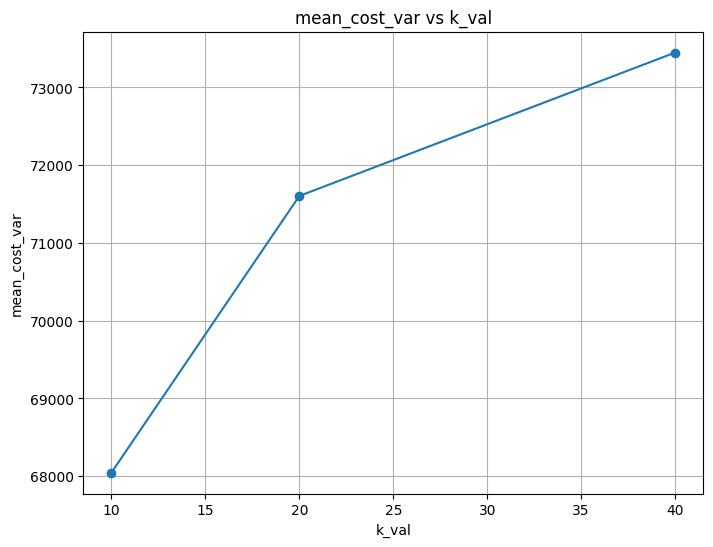

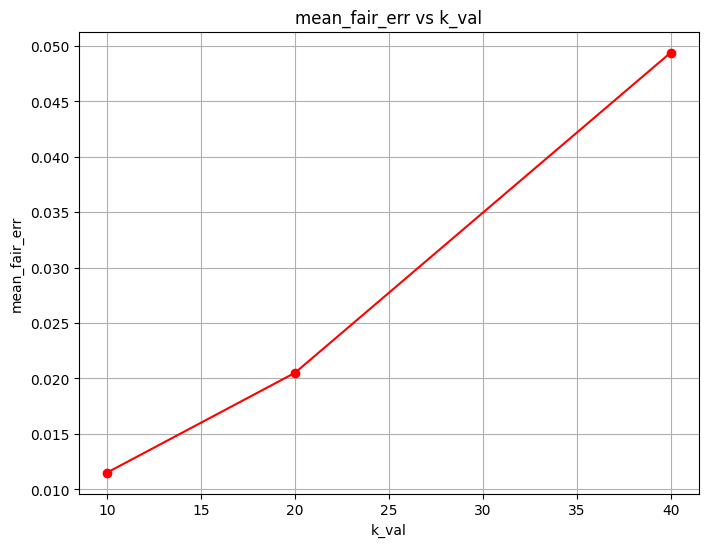

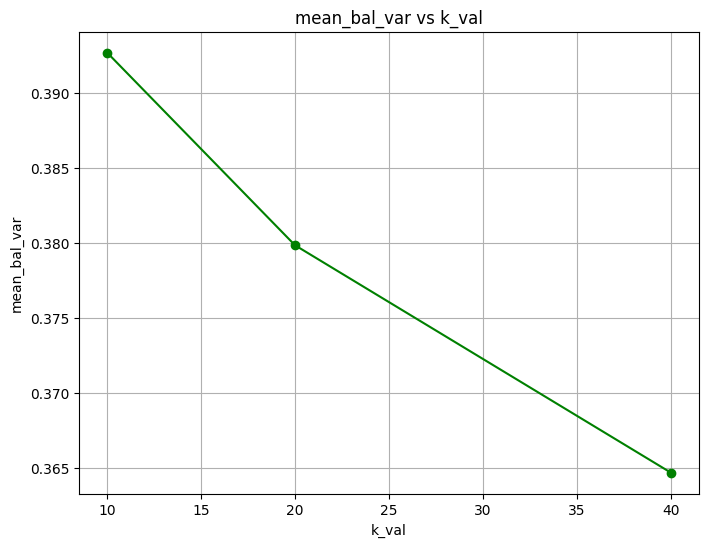

In [ ]:
mean_cost_var=[68046.69538083741, 71603.46124572969, 73446.67927926437]
mean_fair_err=[0.01150959954659621, 0.02051016745918489, 0.049398445908432766]
mean_bal_var=[0.3926755027803024, 0.3798369275980255, 0.36468569793878075]
k_val=[10,20,40]
plt.figure(figsize=(8, 6))
plt.plot(k_val, mean_cost_var, marker='o')
plt.xlabel('k_val')
plt.ylabel('mean_cost_var')
plt.title('mean_cost_var vs k_val')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(k_val, mean_fair_err, marker='o', color='r')
plt.xlabel('k_val')
plt.ylabel('mean_fair_err')
plt.title('mean_fair_err vs k_val')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(k_val, mean_bal_var, marker='o', color='g')
plt.xlabel('k_val')
plt.ylabel('mean_bal_var')
plt.title('mean_bal_var vs k_val')
plt.grid(True)
plt.show()

In [ ]:


def main_center_adult(frac=1, A=5):
    # Step1 : Load the dataset
    df,dfDropped=frac_data(frac)

    list_fair_K=[]
    list_obj_K =[]
    list_balance_K=[]
    list_obj_K_std =[]
    list_fair_K_std=[]
    list_balance_K_std=[]


    if not os.path.exists('Adult_kmeans_center1'):
      os.makedirs('Adult_kmeans_center1')

    for kk in [10,20,40]:
        K = kk

        print(" K=="+str(K)+"  ")

        list_fair_run=[]
        cost_variation_ck_collec =[]
        cost_variation_collec = []
        list_obj_run =[]
        list_balance_run=[]
        seeds = [0,100,200,300,400,500,600,700,800,900,1000,1100]

        for run in range(0,runs):
            np.random.seed(seeds[run])
            random.seed(seeds[run])
            f = open('Bank_kmeans_center1/K_'+str(K)+'_run_'+str(run)+'_output.txt', 'a')


            list_fair_iter=[]
            list_obj_iter =[]
            list_balance_iter=[]

            # Step2 : Find initial K random centroids using k_random_index(df) & find_k_initial_centroid(df)
            if option2=='Kcentercost':
                k_centroid,_,_,cost_variation= VanillaKmeans(dfDropped.values,kk,seeds[run])#VanillaKmeans()find_k_initial_centroid_Kmeans(dfDropped,kk,seeds[run])#find_k_initial_centroid(df,kk)
            else:
                k_centroid,_,_,cost_variation= VanillaKmedian(dfDropped.values,kk,seeds[run])#VanillaKmeans()find_k_initial_centroid_Kmeans(dfDropped,kk,seeds[run])#find_k_initial_centroid(df,kk)
            cost_variation_ck = []

            for eac in cost_variation:
                cost_variation_ck.append(eac)


            prev_assignment =[]
            cluster_assignment = []

            for i in range(0, K):
                cluster_assignment.append([])  # initially all clusters are empty

            sum_time = 0
            curr_itr = 0
            prev_objective_cost=-1
            objective_cost = 0
                # Step3 : Find distances from the centroids using find_distances() with list of [ [x1,y1,z1..] , [x2,y2,z2..]....] centroids format list
            while curr_itr < iterations:# and prev_objective_cost != objective_cost:



                df1 = df.values
                k_centroids1= np.array(k_centroid)

                dist = find_distances_fast_new(k_centroids1, df1, A=A)

                valuation = sort_and_valuation(dist)

                #Step5 : Perform clustering using valuation matrix & hashmap of all points in metric
                hash_map = {}
                for index, row in df.iterrows():
                    temp = tuple(row[:-1])
                    hash_map.update({tuple(row[:-1]): 0})   #dict is of form { (x,y): 0 , ....}

                prev_assignment = cluster_assignment
                cluster_assignment = clustering(valuation, hash_map,K)


                balance = calc_balance(cluster_assignment,K)

                f_error = calc_fairness_error(df, cluster_assignment,K)

                clustering_cost = calc_k_center_cost(k_centroid,cluster_assignment,K)
                if curr_itr!=0:
                     prev_objective_cost = objective_cost

                objective_cost = np.round(clustering_cost,3)

                cost_variation_ck.append(objective_cost)


                list_balance_iter.append(str(balance))
                list_obj_iter.append(str(objective_cost))
                list_fair_iter.append(str(f_error))



                #Step7 : Find new centroids using mean of all points in current assignment
                if option2=='Kcentercost':
                    k_centroid_temp = update_centroids(cluster_assignment,K)
                else:
                    k_centroid_temp = update_centroids_median(cluster_assignment,K)

                clustering_cost_temp = calc_k_center_cost(k_centroid_temp,cluster_assignment,K)
                cost_variation.append(np.round(clustering_cost_temp,3))




                curr_itr += 1

                dual_print(f,'-----------------------------Finished-----------------------------------------------\n')




            #Step 10 : Find balance , fairness error , and clustering objective or cost

            balance_converged = calc_balance(cluster_assignment,K)
            f_error_converged = calc_fairness_error(df, cluster_assignment,K)
            clustering_cost_converged = calc_clustering_objective(k_centroid,cluster_assignment,K)


            cost_variation_collec.append(cost_variation)


            f.close()
            run  = run +1
            list_obj_run.append(clustering_cost_converged)
            list_fair_run.append(f_error_converged)
            list_balance_run.append(balance_converged)


        print("Cost variations over run\n")
        print(str(cost_variation_collec))
        print("\nCost variations over run- CK\n")
        print(str(cost_variation_ck_collec))
        print("\nbalance variations over run")
        print(str(list_balance_run))
        print("\nfairness error over run")
        print(str(list_fair_run))
        print("#"*30)


        list_obj_K.append(np.mean(np.array(list_obj_run)))
        list_fair_K.append(np.mean(np.array(list_fair_run)))
        list_balance_K.append(np.mean(np.array(list_balance_run)))
        list_obj_K_std.append(np.std(np.array(list_obj_run)))
        list_fair_K_std.append(np.std(np.array(list_fair_run)))
        list_balance_K_std.append(np.std(np.array(list_balance_run)))


    print('Mean Cost variation over K ',list_obj_K)
    print('Mean Fairness Error variation over K ',list_fair_K)
    print('Mean Balance variation over K ',list_balance_K)
    print('Std Cost variation over K ',list_obj_K_std)
    print('Std F.Error variation over K ',list_fair_K_std)
    print('Std Balance variation over K ',list_balance_K_std)

main_center_adult(frac=1, A=5)



32561
32561
0.6692054912318418
0.33079450876815825
21790
10771
 K==10  
Cost variations over run

[[13439.271633246293, 11723.05967580239, 10837.28005532786, 10461.903592744491, 10346.74033676695, 10307.712458225356, 10290.442294292146, 10281.373406274653, 10273.785498924935, 10266.893733967661, 10259.200277856622, 10250.299370442684, 10239.589438622066, 10228.049771515552, 10216.917582067967, 10206.187273029265, 10196.511466021553, 10187.451055348916, 10178.75363611519, 10170.487145910512, 10163.222655849742, 10157.760066602914, 10154.58099578027, 10152.347438796214, 10150.609308319647, 10149.11927095239, 10147.98511355599, 10147.092694957111, 10146.481394015602, 10145.82755330584, 10145.094473278274, 10144.455749700905, 10144.015740656516, 10143.711934694902, 10143.405722167787, 10143.18225466036, 10142.908386282505, 10142.666131183814, 10142.31822109003, 10141.973334945187, 10141.622283188995, 10140.987176546822, 10140.279554479035, 10139.552718654533, 10138.60566011631, 10137.81944

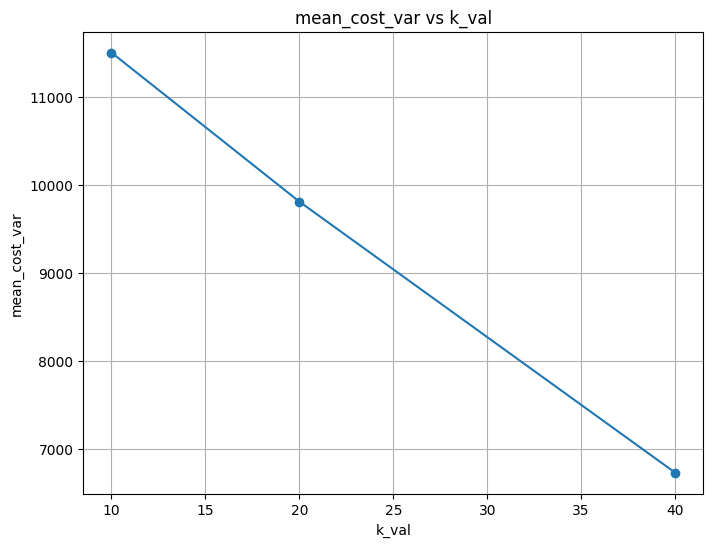

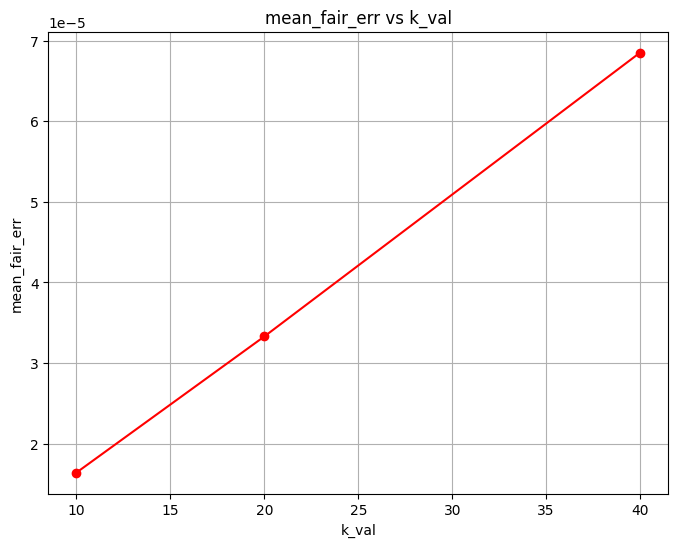

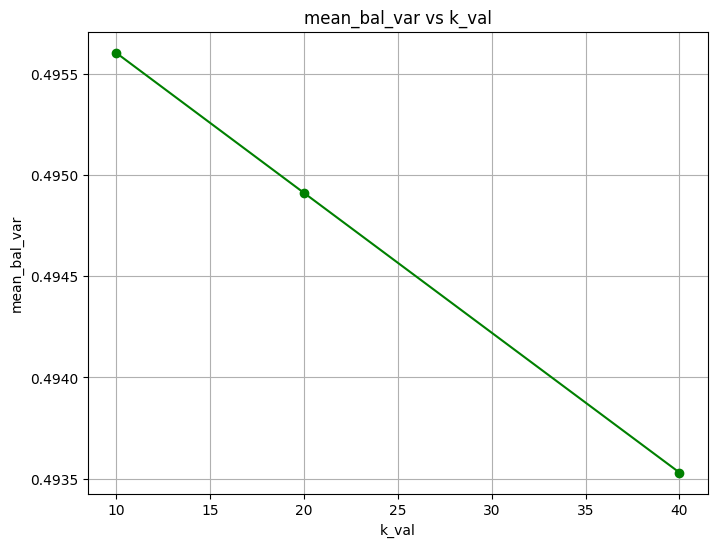

In [ ]:
mean_cost_var=[11503.594362735332, 9809.420455994636, 6729.071520728684]
mean_fair_err=[1.640868668946482e-05, 3.329669263364438e-05, 6.851199767323856e-05]
mean_bal_var=[0.4956038870893105, 0.49491211840888066, 0.49353049907578556]
k_val=[10,20,40]
plt.figure(figsize=(8, 6))
plt.plot(k_val, mean_cost_var, marker='o')
plt.xlabel('k_val')
plt.ylabel('mean_cost_var')
plt.title('mean_cost_var vs k_val')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(k_val, mean_fair_err, marker='o', color='r')
plt.xlabel('k_val')
plt.ylabel('mean_fair_err')
plt.title('mean_fair_err vs k_val')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(k_val, mean_bal_var, marker='o', color='g')
plt.xlabel('k_val')
plt.ylabel('mean_bal_var')
plt.title('mean_bal_var vs k_val')
plt.grid(True)
plt.show()

In [ ]:
import os
import random
import pandas as pd
import numpy as np

# Assuming these functions are defined in your code
def main_flip():
    # Step1 : Load the dataset
    df,dfDropped=frac_data(frac=1)  # Adjust the path as per your dataset location

    # Flip gender column for p% of rows
    p_values = [1, 2, 5, 10, 20]  # Percentage values to flip
    for p in p_values:
        num_rows_to_flip = int(len(df) * p / 100)
        flip_indices = random.sample(range(len(df)), num_rows_to_flip)
        df.loc[flip_indices, 'type'] = 1 - df.loc[flip_indices, 'type']  # Flipping gender values

        # Perform clustering and analysis on the modified dataset
        cluster_and_analyze(df,dfDropped)

def cluster_and_analyze(df,dfDropped):
    list_fair_K = []
    list_obj_K = []
    list_balance_K = []
    list_obj_K_std = []
    list_fair_K_std = []
    list_balance_K_std = []

    if not os.path.exists('Adult_kmeans_center2'):
      os.makedirs('Adult_kmeans_center2')

    for kk in [10]:
        K = kk

        print(" K==" + str(K) + "  ")

        list_fair_run = []
        cost_variation_ck_collec = []
        cost_variation_collec = []
        list_obj_run = []
        list_balance_run = []
        seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]

        for run in range(0, runs):
            np.random.seed(seeds[run])
            random.seed(seeds[run])
            f = open('Adult_kmeans_center2/K_' + str(K) + '_run_' + str(run) + '_output.txt', 'a')

            list_fair_iter = []
            list_obj_iter = []
            list_balance_iter = []

            # Perform the rest of your clustering and analysis steps here
            # Assuming the code is similar to what you had before
            if option1=='Kmeans':
                k_centroid,_,_,cost_variation= VanillaKmeans(dfDropped.values,kk,seeds[run])#VanillaKmeans()find_k_initial_centroid_Kmeans(dfDropped,kk,seeds[run])#find_k_initial_centroid(df,kk)
            else:
                k_centroid,_,_,cost_variation= VanillaKmedian(dfDropped.values,kk,seeds[run])#VanillaKmeans()find_k_initial_centroid_Kmeans(dfDropped,kk,seeds[run])#find_k_initial_centroid(df,kk)
            cost_variation_ck = []

            for eac in cost_variation:
                cost_variation_ck.append(eac)


            prev_assignment =[]
            cluster_assignment = []

            for i in range(0, K):
                cluster_assignment.append([])  # initially all clusters are empty

            sum_time = 0
            curr_itr = 0
            prev_objective_cost=-1
            objective_cost = 0
                # Step3 : Find distances from the centroids using find_distances() with list of [ [x1,y1,z1..] , [x2,y2,z2..]....] centroids format list
            while curr_itr < iterations:# and prev_objective_cost != objective_cost:



                df1 = df.values
                k_centroids1= np.array(k_centroid)

                dist = find_distances_fast_new(k_centroids1, df1, A=A)

                valuation = sort_and_valuation(dist)

                #Step5 : Perform clustering using valuation matrix & hashmap of all points in metric
                hash_map = {}
                for index, row in df.iterrows():
                    temp = tuple(row[:-1])
                    hash_map.update({tuple(row[:-1]): 0})   #dict is of form { (x,y): 0 , ....}

                prev_assignment = cluster_assignment
                cluster_assignment = clustering(valuation, hash_map,K)


                balance = calc_balance(cluster_assignment,K)

                f_error = calc_fairness_error(df, cluster_assignment,K)

                clustering_cost = calc_clustering_objective(k_centroid,cluster_assignment,K)
                if curr_itr!=0:
                     prev_objective_cost = objective_cost

                objective_cost = np.round(clustering_cost,3)

                cost_variation_ck.append(objective_cost)


                list_balance_iter.append(str(balance))
                list_obj_iter.append(str(objective_cost))
                list_fair_iter.append(str(f_error))



                #Step7 : Find new centroids using mean of all points in current assignment
                if option1=='Kmeans':
                    k_centroid_temp = update_centroids(cluster_assignment,K)
                else:
                    k_centroid_temp = update_centroids_median(cluster_assignment,K)

                clustering_cost_temp = calc_clustering_objective(k_centroid_temp,cluster_assignment,K)
                cost_variation.append(np.round(clustering_cost_temp,3))


                curr_itr += 1

                dual_print(f,'-----------------------------Finished-----------------------------------------------\n')




            #Step 10 : Find balance , fairness error , and clustering objective or cost

            balance_converged = calc_balance(cluster_assignment,K)
            f_error_converged = calc_fairness_error(df, cluster_assignment,K)
            clustering_cost_converged = calc_clustering_objective(k_centroid,cluster_assignment,K)


            cost_variation_collec.append(cost_variation)

            f.close()
            run = run + 1
            list_obj_run.append(clustering_cost_converged)
            list_fair_run.append(f_error_converged)
            list_balance_run.append(balance_converged)

        print("Cost variations over run\n")
        print(str(cost_variation_collec))
        print("\nCost variations over run- CK\n")
        print(str(cost_variation_ck_collec))
        print("\nbalance variations over run")
        print(str(list_balance_run))
        print("\nfairness error over run")
        print(str(list_fair_run))
        print("#" * 30)

        list_obj_K.append(np.mean(np.array(list_obj_run)))
        list_fair_K.append(np.mean(np.array(list_fair_run)))
        list_balance_K.append(np.mean(np.array(list_balance_run)))
        list_obj_K_std.append(np.std(np.array(list_obj_run)))
        list_fair_K_std.append(np.std(np.array(list_fair_run)))
        list_balance_K_std.append(np.std(np.array(list_balance_run)))

    print('Mean Cost variation over K ', list_obj_K)
    print('Mean Fairness Error variation over K ', list_fair_K)
    print('Mean Balance variation over K ', list_balance_K)
    print('Std Cost variation over K ', list_obj_K_std)
    print('Std F.Error variation over K ', list_fair_K_std)

    print('Std Balance variation over K ', list_balance_K_std)

main_flip()


32561
32561
0.6692054912318418
0.33079450876815825
21790
10771
 K==10  
Cost variations over run

[[12740.072908203892, 11608.77264324412, 11333.698060300405, 11188.063272418465, 11061.397210806055, 10950.83546366446, 10856.243044735953, 10783.232054299111, 10721.490133559533, 10661.19573758222, 10604.873845004431, 10539.838057219069, 10469.382619593514, 10405.8406575869, 10356.619070212555, 10326.168158169732, 10310.110353465081, 10301.357582471346, 10296.10432640448, 10293.009678047803, 10291.233607198927, 10290.262795753204, 10289.633191073033, 10289.199536753276, 10288.842448129446, 10288.532564052291, 10288.225178902205, 10288.054027720395, 10287.985466959746, 10287.908661074287, 10287.865116380104, 10287.828066005291, 10287.779316013803, 10287.73589466184, 10287.71296961359, 10287.68816065285, 10287.66543887858, 10287.656230178982, 10287.652963133332, 10287.649877247515, 10287.640572620478, 10287.620601262975, 10287.579974152084, 10287.530962101075, 10287.480870601108, 10287.4412